# Import environment

In [3]:
import os
from datetime import datetime
import pathlib


if 'main_dir' in globals():
    os.chdir(main_dir)

import pandas as pd
from utils.load_config import (
    load_exp_config, 
    get_value_from_fields, 
    )

from utils.load_data import (
    get_df_from_datetime_range
    )

from utils.plotting import (
    STICK_SIZE,
    plot_cost_ic_learning_curve_mod,
    plot_cost_median_mod_learning_curve,
    plot_cost_median_top_5_learning_curve,
    plot_accum_cost_ic,
    plot_accum_cost_median,
    plot_chosen_best_checkpoint,
    plot_distance_goal_hist
    )

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# plt.style.use("tableau-colorblind10")
plt.style.use("seaborn-v0_8-whitegrid")

from regelum.objective import RunningObjective
from regelum.model import ModelQuadLin
import numpy as np


if os.getcwd().endswith("notebooks"):
    main_dir = os.getcwd()
    os.chdir("..")

%matplotlib inline

In [4]:
try:
    from src.objective import ThreeWheeledRobotCostWithSpot
except:
    from src.objective import ThreeWheeledRobotCostWithSpot

# Setup Objective function for re-calculation

In [5]:

objective_function = RunningObjective(ModelQuadLin(
    weights= [2, 10, 0, 0, 0],
    quad_matrix_type="diagonal",
    is_with_linear_terms=False,
))

objective_function = ThreeWheeledRobotCostWithSpot(
    quadratic_model=ModelQuadLin(
        weights= [100, 100, 0, 0, 0],
        quad_matrix_type="diagonal",
        is_with_linear_terms=False),
        spot_gain=500,
        spot_x_center=-1.5,
        spot_y_center=-1.5,
        spot_std=0.2,
    )


def get_sampling_time(exp_path):
    config = load_exp_config(exp_path)

    sampling_time = config['scenario']['sampling_time']
    if "$" in sampling_time:
        correct_fields = sampling_time.strip("\{\}$").split(".")
        sampling_time = get_value_from_fields(config, correct_fields)

    return sampling_time

    

In [6]:

observation = np.array([[1, 1, 0.01]])
actions = np.array([[1, 1]])
objective_function(observation, actions)

200.0

## Plot objective

In [7]:
def get_cost_map(x_lim, y_lim):
    X = np.arange(x_lim[0], x_lim[1], 0.01)
    Y = np.arange(y_lim[0], y_lim[1], 0.01)

    X, Y = np.meshgrid(X, Y)
    Z = []
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z.append(objective_function(observation=np.array([[X[i, j], Y[i, j], 0]]),
                                        action=np.array([[0, 0]])))

    Z = np.array(Z).reshape((X.shape[0], X.shape[1]))
    
    return X, Y, Z

X, Y, Z = get_cost_map([-3, 0.3], [-3, 0.3])

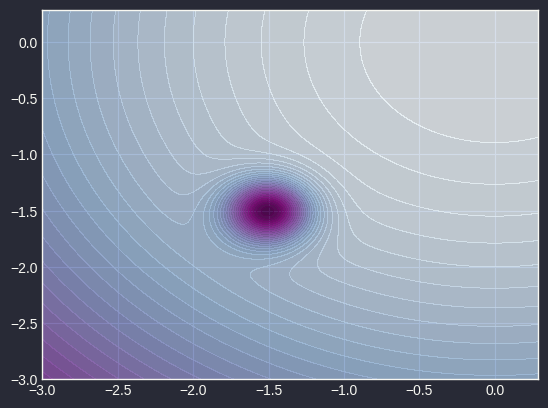

In [8]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z, alpha=0.8, levels=35, cmap="BuPu")
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

# Plotting

## Get data from experiments

In [9]:
DECAY_RATE = 1

end_datetime_str = start_datetime_str = "2024-10-15 11-12-50"
stanley_df = get_df_from_datetime_range(start_datetime_str, 
                                        end_datetime_str, 
                                        objective_function=objective_function,
                                        decay_rate=DECAY_RATE)

In [10]:
DECAY_RATE = 1

# start_datetime_str = "2024-09-20 11-53-51" 
# end_datetime_str = "2024-09-20 15-48-40"
# start_datetime_str = "2024-10-02 16-28-50"s
# end_datetime_str = "2024-10-04 08-55-00"

start_datetime_str = "2024-10-15 17-20-00"
end_datetime_str = "2024-10-16 02-56-46"
calf_df = get_df_from_datetime_range(start_datetime_str, 
                                     end_datetime_str, 
                                     objective_function=objective_function,
                                     decay_rate=DECAY_RATE,
                                     max_iter=np.inf,
                                     reload=True)

calf_df.head() 

At 0.5020000000004075 0.5005027260962048
At 0.569999999999709 4.754341840638355
At 0.6159999999999854 3.4083306362777965
At 0.5039999999989959 0.7360318257927948
At 0.5930000000007567 5.65466910035163
At 0.6750000000001819 0.6150956599466941
At 0.7000000000007276 1.6571521987829176
At 0.5019999999999527 1.0763986176342386
At 0.6209999999991851 1.3716619994425525
At 0.7070000000021537 2.618133259281109
At 0.5 6.740407951200208
At 0.5030000000006112 0.36132214124892276
At 0.5679999999993015 1.205217599656485
At 0.5040000000008149 0.6210547846723813
At 0.5040000000008149 0.619269258891219
At 0.7450000000000045 3.4890404336631966
At 0.7560000000000855 0.7465463435442106
At 0.5019999999999527 1.3364833377222296
At 0.7839999999999918 2.081609594942235
At 0.5990000000001601 2.0026747484323386
At 0.5460000000002765 3.0749551696721875
At 0.5779999999977008 1.8234456630524538
At 0.5 3.9313698030438036
At 0.5 0.3948822734414515
At 0.5010000000002037 2.1170437349440343
At 0.6890000000021246 2.0327

,time,running_objective,current_value,episode_id,iteration_id,velocity [m/s],steering angle [rad],x [m],y [m],angle [rad],use_calf,critic_new,critic_safe,critic_low_kappa,critic_up_kappa,calf_diff,absolute_path,objective_value,accumulative_objective,experiment_path
0,0.000,180.000000,1800.000000,1,1,0.499996,-0.000319,-3.000000,-3.000000,0.000100,1,8343.740302,8343.750303,1800.000001,14400.000008,-0.010000,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1800.000000,180.000000,/home/tcc/huyhoang/qcar-regelum-playground/reg...
1,0.518,355.406157,1754.061573,1,1,0.500000,-0.000212,-2.922622,-2.999816,0.000665,1,8343.740281,8343.740302,1754.061616,14032.492931,-0.000021,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1754.061479,355.406148,/home/tcc/huyhoang/qcar-regelum-playground/reg...
2,1.020,526.030606,1706.244486,1,1,0.500000,-0.000142,-2.839681,-2.999776,0.000447,1,8343.740271,8343.740281,1706.244505,13649.956043,-0.000010,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1706.244439,526.030592,/home/tcc/huyhoang/qcar-regelum-playground/reg...
3,1.522,692.025874,1659.952685,1,1,0.500000,0.000272,-2.756936,-2.999805,-0.000854,1,8343.740261,8343.740271,1659.952757,13279.622055,-0.000010,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1659.952759,692.025868,/home/tcc/huyhoang/qcar-regelum-playground/reg...
4,2.108,852.653886,1606.280118,1,1,0.499999,0.000553,-2.657720,-2.999887,-0.001738,1,8343.730258,8343.740261,1606.280417,12850.243335,-0.010003,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1606.280088,852.653877,/home/tcc/huyhoang/qcar-regelum-playground/reg...


## Define colors

In [11]:
color_selection = {
    "CALF": ["lightblue", "tab:blue"],
    "Stanley": ["tab:red"],
}

## Plot learning curves

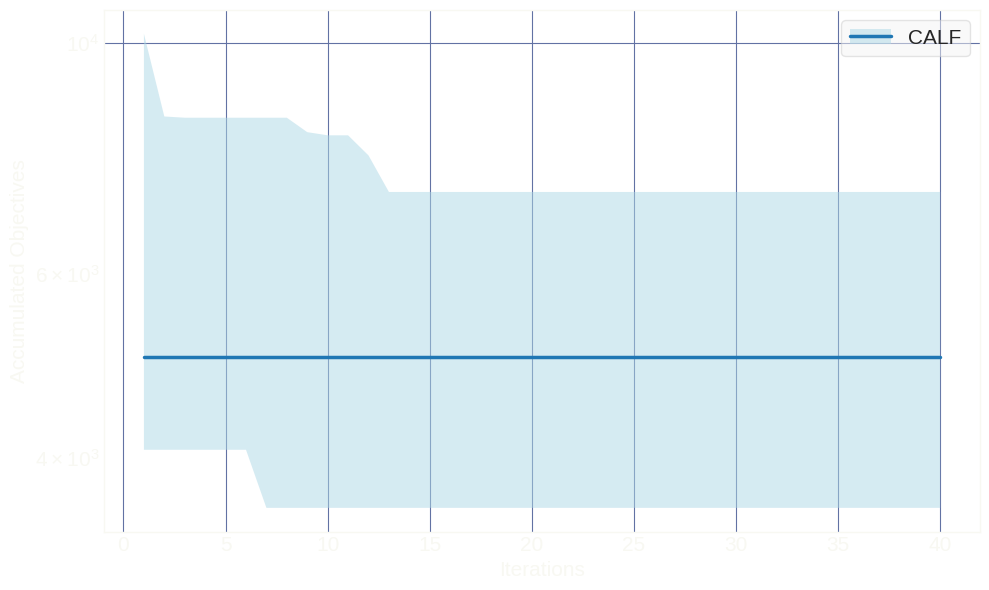

In [12]:
# %matplotlib inline
plt.clf()

MEDIUM_SIZE = 10
BIG_SIZE = 15
plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=BIG_SIZE)
plt.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIG_SIZE)

plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')
plt.style.use("seaborn-v0_8-whitegrid")

p3 = plot_cost_ic_learning_curve_mod(calf_df, ax,
                                     low_quantile=0.025, high_quantile=0.975, 
                                     color=color_selection["CALF"][0], 
                                     use_interpolate=True)
p4 = plot_cost_median_mod_learning_curve(calf_df, ax, color=color_selection["CALF"][1])

# p6 = ax.axhline(y=stanley_df.accumulative_objective.values[-1], color=color_selection["Stanley"][0], linestyle="solid")


legend_info = {
    "CALF": (p3, p4),
    # "Stanley": p6
}

legend = ax.legend(legend_info.values(), 
                   legend_info.keys(),
                   facecolor='whitesmoke', 
                   framealpha=0.5)
legend.set_frame_on(True)

ax.set_yscale("log")
# ax.set_xlim(0, 40)
# ax.set_ylim(5000, 10000)
plt.tight_layout()
fig.savefig("media/report_learning_curves.svg", 
            facecolor='w',
            bbox_inches = 'tight',
            pad_inches = 0)

## Plot accumulated cost over time

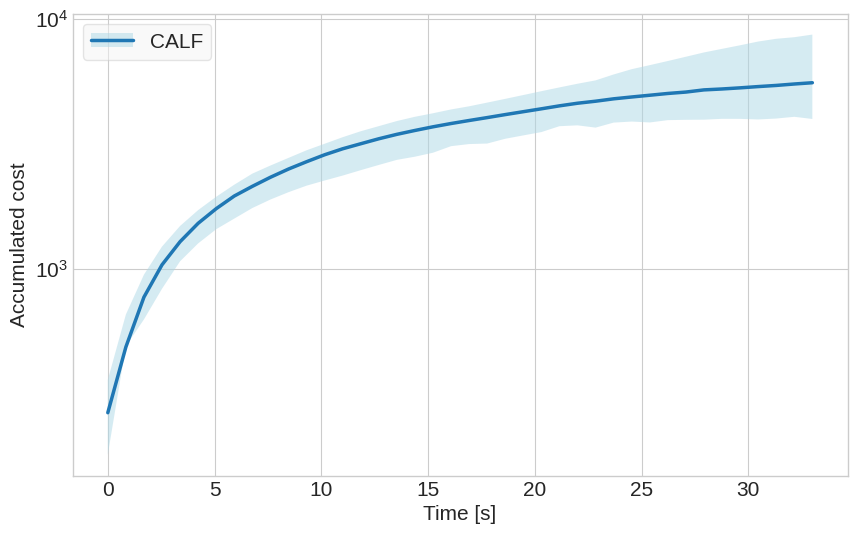

In [13]:
# %matplotlib inline

plt.clf()
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')
# ax.patch.set_facecolor('white')
plt.style.use("seaborn-v0_8-whitegrid")

p3 = plot_accum_cost_ic(calf_df, ax, color=color_selection["CALF"][0])
p4 = plot_accum_cost_median(calf_df, ax, color=color_selection["CALF"][1])

# p6 = plot_accum_cost_median(stanley_df, ax, color=color_selection["Stanley"][0])


legend_info = {
    "CALF": (p3, p4),
    # "Stanley": p6
}

legend = ax.legend(legend_info.values(), 
                   legend_info.keys(),
                   facecolor='whitesmoke', 
                   framealpha=0.5)
legend.set_frame_on(True)

ax.set_yscale("log")
# ax.set_xlim(0, 40)

ax.set_ylabel("Accumulated cost")

ax.tick_params(axis='both', labelsize=STICK_SIZE)

fig.savefig("media/report_acc_costs.svg", 
            facecolor="white",
            bbox_inches = 'tight',
            pad_inches = 0)
# plt.show()
# frame

# Plot trajectories

1. Find the best checkpoint of CALF, SARSA_m, PPO
2. Run the best checkpoints with 25 seeds
3. Plot each of them in 1 subplot and with Nominal, 3x MPC

## Find the best CALF and Control signal

In [14]:
calf_df
calf_df["goal_err"] = calf_df.apply(lambda x: np.linalg.norm([x["x [m]"], x["y [m]"]]), axis=1)

group_df = calf_df.groupby(["absolute_path"]).last()
group_df = group_df[group_df.goal_err < 2]
id = group_df[group_df.accumulative_objective == group_df.accumulative_objective.min()].index
id
calf_df.query(f"absolute_path == \"{id[0]}\"")
# calf_df.absolute_path == id[0]



,time,running_objective,current_value,episode_id,iteration_id,velocity [m/s],steering angle [rad],x [m],y [m],angle [rad],...,critic_new,critic_safe,critic_low_kappa,critic_up_kappa,calf_diff,absolute_path,objective_value,accumulative_objective,experiment_path,goal_err
0,0.000,180.000000,1800.000000,1,8,0.500000,1.494735,-3.000000,-3.000000,0.000100,...,14400.000017,15420.976493,1800.000001,14400.000008,-1020.976476,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1800.000000,180.000000,/home/tcc/huyhoang/qcar-regelum-playground/reg...,4.242641
1,0.500,354.854133,1748.541328,1,8,0.500000,-0.033616,-2.928276,-2.985054,0.080832,...,13993.505423,15420.976493,1749.188178,13993.505423,-1427.471070,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1748.534823,354.853482,/home/tcc/huyhoang/qcar-regelum-playground/reg...,4.181549
2,1.350,518.904568,1640.504355,1,8,0.500000,-0.130634,-2.794623,-2.931599,0.292108,...,13175.337855,13993.505423,1648.951732,13191.613860,-818.167568,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1640.419066,518.895389,/home/tcc/huyhoang/qcar-regelum-playground/reg...,4.050209
3,1.873,676.605493,1577.009247,1,8,0.500000,0.000000,-2.710893,-2.901751,0.314428,...,12612.065950,13175.337855,1586.796881,12694.375049,-563.271905,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1576.910348,676.586424,/home/tcc/huyhoang/qcar-regelum-playground/reg...,3.971033
4,2.691,825.380777,1487.752839,1,8,0.500000,0.000000,-2.583658,-2.863800,0.298832,...,11814.298097,12612.065950,1496.593601,11972.748811,-797.767853,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1487.663531,825.352777,/home/tcc/huyhoang/qcar-regelum-playground/reg...,3.857024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,47.752,3081.271950,11.221529,1,8,0.016711,-1.347821,-0.128850,-0.286729,1.157569,...,1936.455470,6533.936289,143.878125,1151.024998,-4597.480819,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.881563,3073.689554,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.314350
82,48.351,3082.372554,11.006044,1,8,0.016376,-1.334714,-0.126920,-0.283942,1.154491,...,1919.158289,6533.936289,142.958182,1143.665453,-4614.778000,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.673195,3074.656873,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.311018
83,48.851,3083.454633,10.820783,1,8,0.016093,-0.943645,-0.125311,-0.281514,1.151294,...,1906.932268,6533.936289,142.043003,1136.344020,-4627.004021,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.495306,3075.606404,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.308145
84,49.355,3084.516256,10.616230,1,8,0.015792,-0.988669,-0.123392,-0.278909,1.146584,...,1863.861536,6533.936289,140.766951,1126.135610,-4670.074753,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.301575,3076.536561,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.304985


/home/tcc/huyhoang/qcar-regelum-playground/regelum_data/outputs/2024-10-15/23-09-12/0/.callbacks/CALFHistoricalDataCallback/observations_actions_it_00008.h5


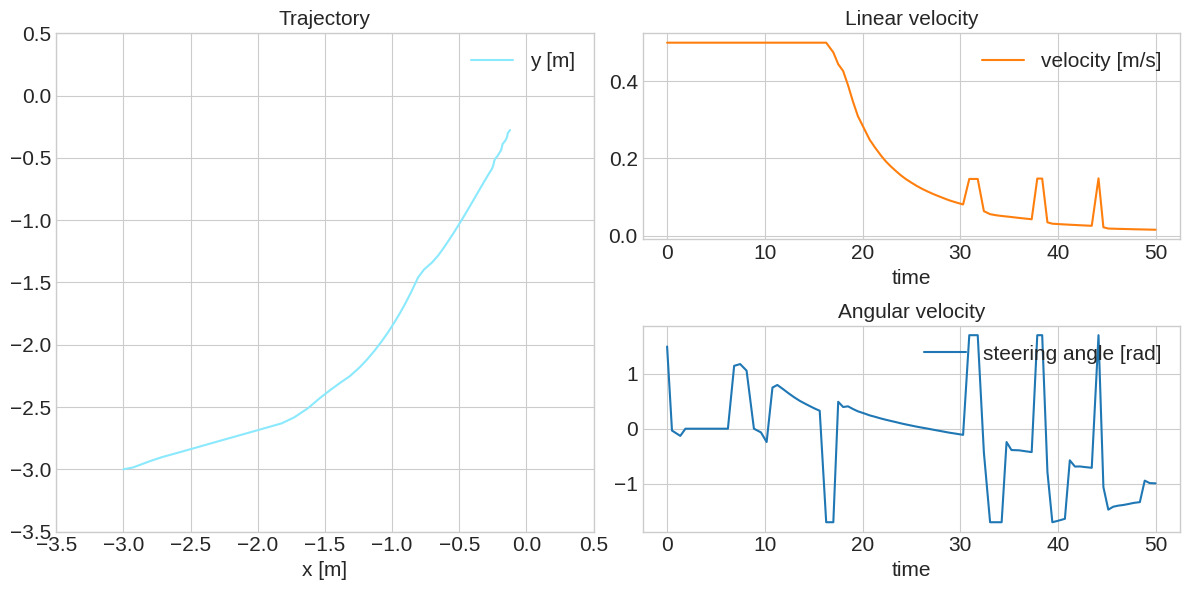

In [15]:
def find_best_exp_from_df(df, radius=2):
    df["goal_err"] = df.apply(lambda x: np.linalg.norm([x["x [m]"], x["y [m]"]]), axis=1)

    group_df = df.groupby(["absolute_path"]).last()
    group_df = group_df[group_df.goal_err < radius]

    index = group_df[group_df.accumulative_objective == group_df.accumulative_objective.min()].index
    best_exp = df.query(f"absolute_path == \"{index[0]}\"")

    return best_exp, index[0]

best_calf_df, best_calf_path = find_best_exp_from_df(calf_df, radius=2)

print(best_calf_path)

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
best_calf_df.plot(x="x [m]", y="y [m]", title="Trajectory", ax=ax1)
ax1.set_ylim(-3.5, 0.5)
ax1.set_xlim(-3.5, 0.5)

ax2 = plt.subplot(2, 2, 2)
best_calf_df.plot(x="time", 
                  y="velocity [m/s]", ax=ax2, color="tab:orange", title="Linear velocity")

ax3 = plt.subplot(2, 2, 4)
best_calf_df.plot(x="time", 
                  y="steering angle [rad]", ax=ax3, color="tab:blue", title="Angular velocity")
plt.tight_layout()

In [16]:
best_calf_df

,time,running_objective,current_value,episode_id,iteration_id,velocity [m/s],steering angle [rad],x [m],y [m],angle [rad],...,critic_new,critic_safe,critic_low_kappa,critic_up_kappa,calf_diff,absolute_path,objective_value,accumulative_objective,experiment_path,goal_err
0,0.000,180.000000,1800.000000,1,8,0.500000,1.494735,-3.000000,-3.000000,0.000100,...,14400.000017,15420.976493,1800.000001,14400.000008,-1020.976476,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1800.000000,180.000000,/home/tcc/huyhoang/qcar-regelum-playground/reg...,4.242641
1,0.500,354.854133,1748.541328,1,8,0.500000,-0.033616,-2.928276,-2.985054,0.080832,...,13993.505423,15420.976493,1749.188178,13993.505423,-1427.471070,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1748.534823,354.853482,/home/tcc/huyhoang/qcar-regelum-playground/reg...,4.181549
2,1.350,518.904568,1640.504355,1,8,0.500000,-0.130634,-2.794623,-2.931599,0.292108,...,13175.337855,13993.505423,1648.951732,13191.613860,-818.167568,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1640.419066,518.895389,/home/tcc/huyhoang/qcar-regelum-playground/reg...,4.050209
3,1.873,676.605493,1577.009247,1,8,0.500000,0.000000,-2.710893,-2.901751,0.314428,...,12612.065950,13175.337855,1586.796881,12694.375049,-563.271905,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1576.910348,676.586424,/home/tcc/huyhoang/qcar-regelum-playground/reg...,3.971033
4,2.691,825.380777,1487.752839,1,8,0.500000,0.000000,-2.583658,-2.863800,0.298832,...,11814.298097,12612.065950,1496.593601,11972.748811,-797.767853,/home/tcc/huyhoang/qcar-regelum-playground/reg...,1487.663531,825.352777,/home/tcc/huyhoang/qcar-regelum-playground/reg...,3.857024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,47.752,3081.271950,11.221529,1,8,0.016711,-1.347821,-0.128850,-0.286729,1.157569,...,1936.455470,6533.936289,143.878125,1151.024998,-4597.480819,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.881563,3073.689554,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.314350
82,48.351,3082.372554,11.006044,1,8,0.016376,-1.334714,-0.126920,-0.283942,1.154491,...,1919.158289,6533.936289,142.958182,1143.665453,-4614.778000,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.673195,3074.656873,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.311018
83,48.851,3083.454633,10.820783,1,8,0.016093,-0.943645,-0.125311,-0.281514,1.151294,...,1906.932268,6533.936289,142.043003,1136.344020,-4627.004021,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.495306,3075.606404,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.308145
84,49.355,3084.516256,10.616230,1,8,0.015792,-0.988669,-0.123392,-0.278909,1.146584,...,1863.861536,6533.936289,140.766951,1126.135610,-4670.074753,/home/tcc/huyhoang/qcar-regelum-playground/reg...,9.301575,3076.536561,/home/tcc/huyhoang/qcar-regelum-playground/reg...,0.304985


In [17]:
# def check_if_falling_case(df, sampling_time=0.1, max_linear_vel=1.2):


# best_calf_df.apply(lambda row: (row["x [m]"], row["x [y]"]), axis=1)

def validity_check(df):
    old_position = None
    old_timestamp = 0
    for idx, data in df.iterrows():
        position = np.array([data["x [m]"], data["y [m]"]])
        if old_position is not None:
            position_change = np.linalg.norm(position - old_position)
            delta_t = data["time"] - old_timestamp
            # print(position_change)
            if (position_change > delta_t*df["velocity [m/s]"].abs().max()):
                print("At", data["time"], position_change)
                return False

        old_timestamp = data["time"]
        old_position = position

    return True

print(validity_check(best_calf_df))
best_calf_df["velocity [m/s]"].max()

True


0.5

## Load Runs with best checkpoints

In [18]:
# CALF with spot penalty 1e2
# start_datetime_str = "2024-09-20 11-53-51"
# end_datetime_str = "2024-09-20 15-48-40"
best_calf_df = get_df_from_datetime_range(start_datetime_str, 
                                          end_datetime_str,
                                          objective_function=objective_function, 
                                          decay_rate=DECAY_RATE)


## Plotting trajectories functions

## Plotting trajectories

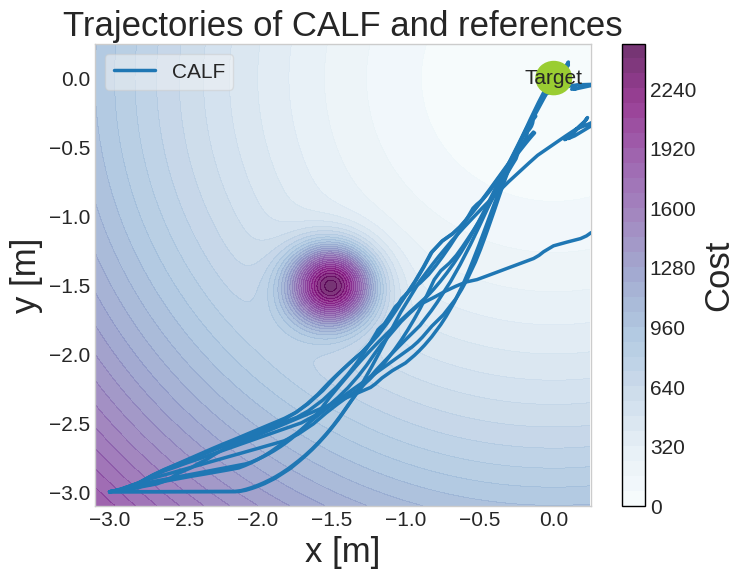

In [19]:
group_df = best_calf_df.groupby(["absolute_path"]).last()
top_10_abs_path = group_df.sort_values(by="accumulative_objective").iloc[:10, :].index
top_10_df = best_calf_df[best_calf_df["absolute_path"].isin(top_10_abs_path)]
plot_chosen_best_checkpoint(top_10_df, "CALF", 
                            color_selection["CALF"][1], 
                            linestyle="solid", 
                            target_r=0.12,
                            get_cost_map_func=get_cost_map,
                            y_lim=[-3.1, 0.25],
                            x_lim=[-3.1, 0.25])

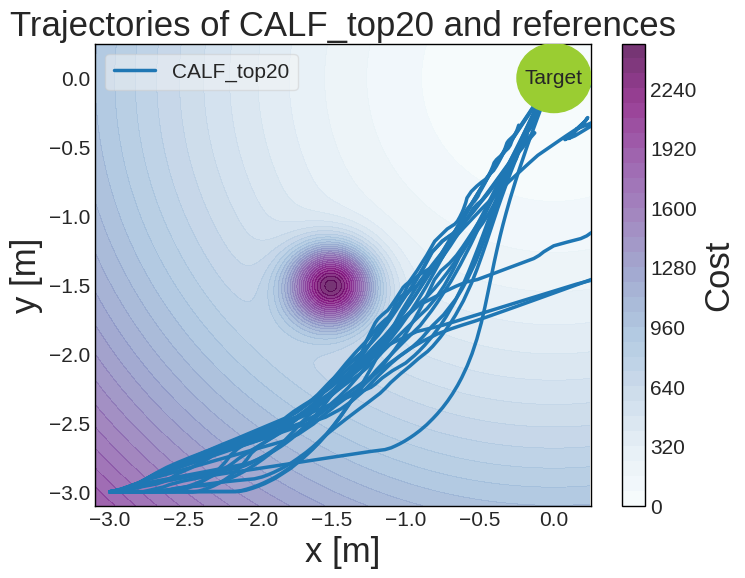

In [20]:
N_TOP=20
group_df = best_calf_df.groupby(["absolute_path"]).last()
top_abs_path = group_df.sort_values(by="accumulative_objective").iloc[:N_TOP, :].index
top_df = best_calf_df[best_calf_df["absolute_path"].isin(top_abs_path)]
plot_chosen_best_checkpoint(top_df, f"CALF_top{N_TOP}", 
                            color_selection["CALF"][1], 
                            linestyle="solid", 
                            target_r=0.25,
                            get_cost_map_func=get_cost_map,
                            y_lim=[-3.1, 0.25],
                            x_lim=[-3.1, 0.25])

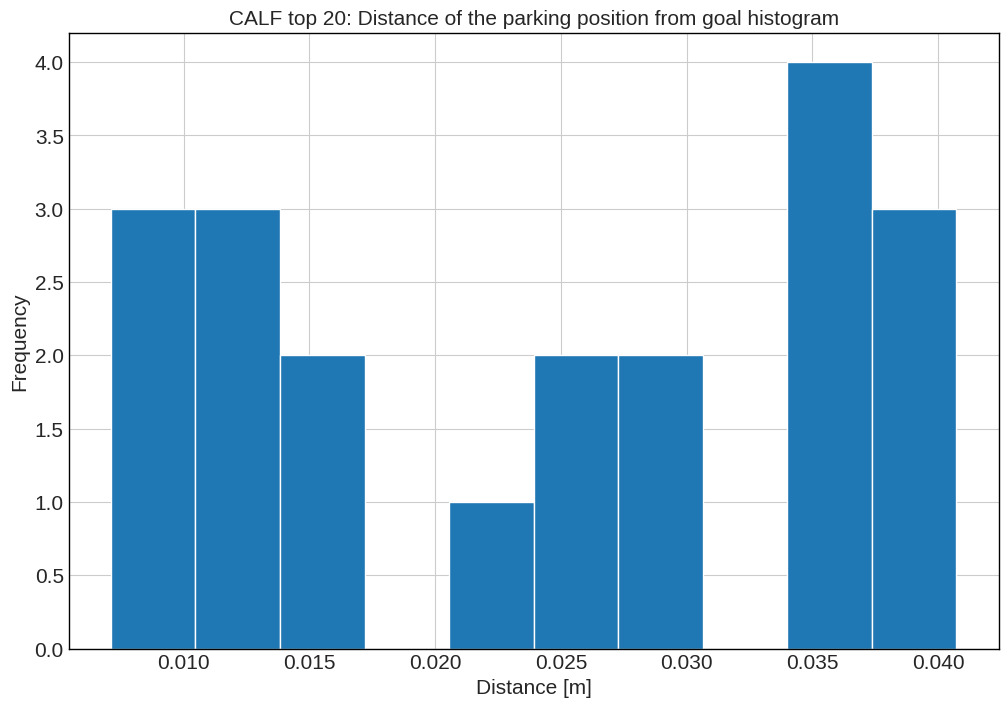

In [21]:
   
plot_distance_goal_hist(best_calf_df, "CALF", color_selection["CALF"][1], n_top=20)